# DBSCAN Clustering 
## Use case: A solution for segmenting the credit card user dataset

In this workshop we will walk through how to use the DBSCAN algorithm. The dataset that will be used is the credit card dataset. 

First let's import the necessary dependencies: 

In [3]:
import numpy as np 
import pandas as pd 
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 
import matplotlib


Next, we can load the data and check the basic attributes of the data: 

In [4]:
data = pd.read_csv("credit_card_dataset.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


If you eyeball the data you should notice some NaNs. Before we start analysing the data we should address these. First, we will count the null values: 

In [5]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

The MINIMUM_PAYMENTS attribute has 313 null values and the CREDIT_LIMIT attribute has 1 null value. We are going to fill these values with the average values for that attribute. 

Note, we will also check the count of NaNs afterwards to verify if this has worked. 

In [6]:
data.fillna(data.mean(), inplace=True)
data.isnull().sum()

C:\Users\mmc212\AppData\Local\Temp\ipykernel_10048\1963192550.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Next, we will scale and apply principal component analysis for feature extraction to reduce the dimentionality of the dataset. 

In [9]:
data = data.drop('CUST_ID', axis=1)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)

In [13]:
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_scaled)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['V1', 'V2']
print(x_principal.head())

         V1        V2
0 -1.682219 -1.076461
1 -1.138291  2.506460
2  0.969683 -0.383504
3 -0.873625  0.043146
4 -1.599434 -0.688586


Finally we will find the value of the EPS. 

In [15]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x_principal)
distances, indices = nbrs.kneighbors(x_principal)
print(distances)

[[0.         0.01123026]
 [0.         0.08480743]
 [0.         0.02713134]
 ...
 [0.         0.03619051]
 [0.         0.03755826]
 [0.         0.00880413]]


Plot K-distances graph 

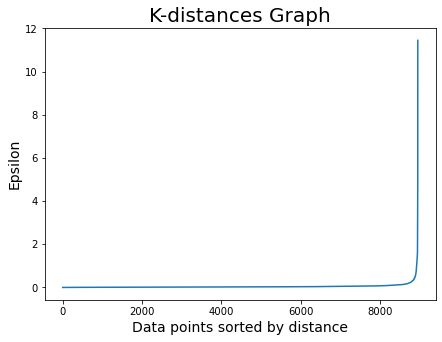

In [16]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(7,5))
plt.plot(distances)
plt.title('K-distances Graph', fontsize=20)
plt.xlabel('Data points sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()

Implement DBSCAN to look at the data and the clusters 

In [38]:
eps_val = 0.4
samples = 6
dbscan = DBSCAN(eps=eps_val, min_samples=samples).fit(x_principal)
labels = dbscan.labels_

data['DBSCAN_labels']=dbscan.labels_
data['DBSCAN_labels'].value_counts()


 0    8699
-1     220
 1       9
 4       8
 2       7
 3       7
Name: DBSCAN_labels, dtype: int64

In [45]:
labels.max()

4

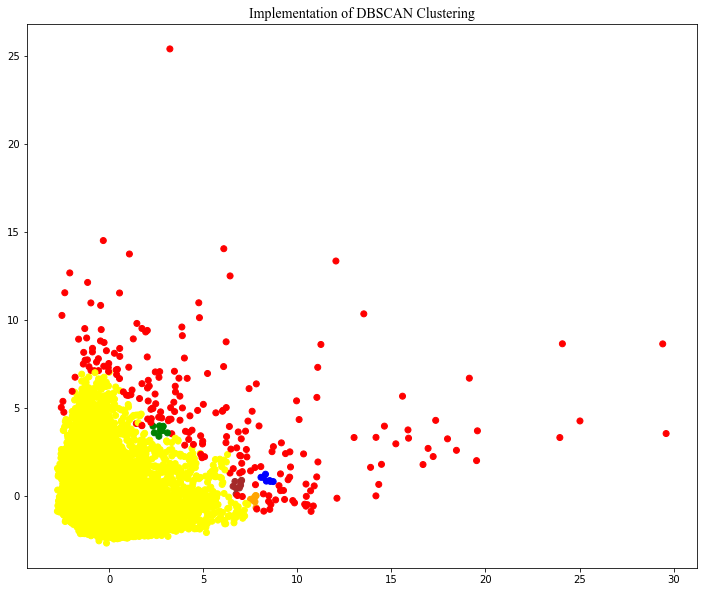

In [47]:
clusterColor = { 0:u'yellow', 1:u'green', 2:'blue', 3:'orange', 4:'brown', -1:'red' }
colors = [clusterColor[label] for label in labels]
plt.figure(figsize=(12,10))
plt.scatter(x_principal['V1'],x_principal['V2'], c=colors)
plt.title("Implementation of DBSCAN Clustering", fontname="Times New Roman", fontsize=14)
plt.show()

Acknowledgement: Adapated from an Arman Kharwal article on DBSCAN. 